# STEP 2 — Exploratory Data Analysis (Business-Driven)

## 2.1 Load Cleaned Data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/marketing_campaign_data_cleaned.csv")

## 2.2 Target Variable Check (Campaign Response)

In [18]:
df['Response'].value_counts(normalize=True) * 100

Response
0    85.241071
1    14.758929
Name: proportion, dtype: float64

- Interpretation (you should record this verbatim in your notebook/report)

-- ~85.24% of customers did not respond to campaigns

-- ~14.76% of customers did respond

- What this means business-wise:

-- Campaign acceptance is rare, so blanket campaigns are inefficient.

-- The objective is not to increase volume, but to identify and target the right segments.

## 2.3 Univariate Analysis

#### Age Distribution

- Why this matters: Age will later be used for target customer profiling.

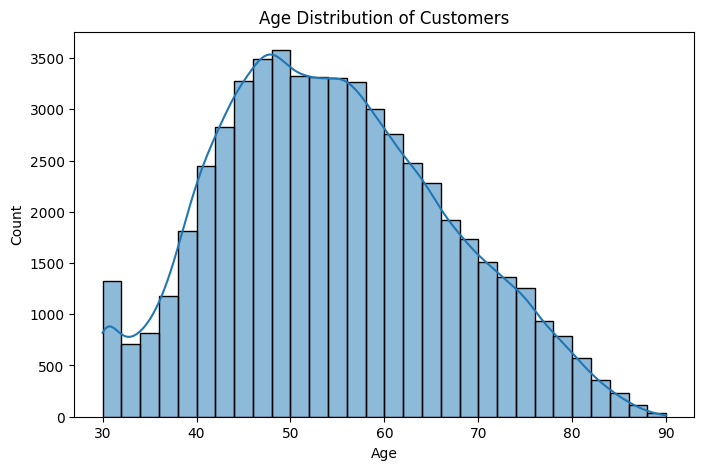

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.show()

#### Income Distribution

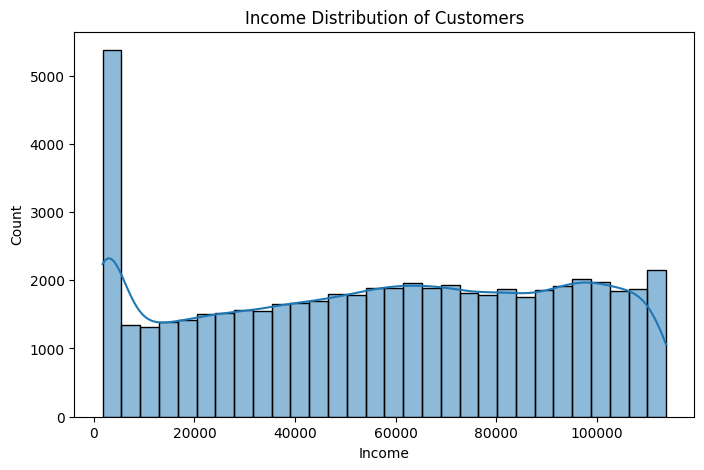

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title("Income Distribution of Customers")
plt.show()


The income distribution is highly right skewed, with a large proportion of customers in lower income brackets and a smaller but important group of high-income customers. This indicates that income-based segmentation using percentiles and thresholds is more appropriate than averages. High-income customers represent a smaller segment but are likely to contribute disproportionately to campaign success and revenue.

### Total Spend Distribution

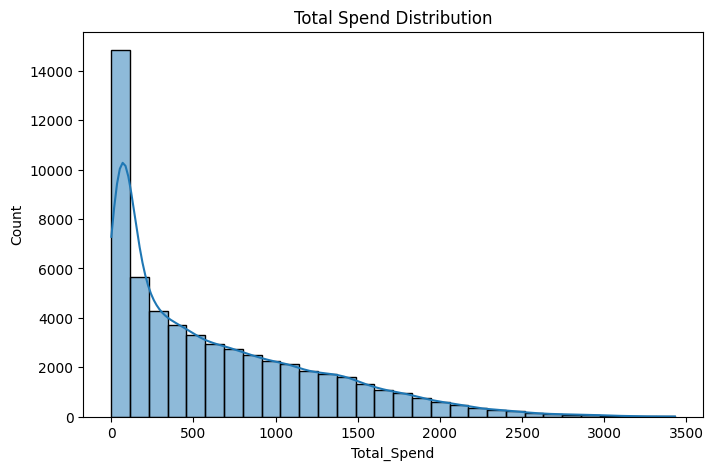

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['Total_Spend'], bins=30, kde=True)
plt.title("Total Spend Distribution")
plt.show()

Business takeaway:
A small group of customers contributes disproportionately to revenue.

## 2.4 Bivariate Analysis

### 2.4.1 Income vs Campaign Response

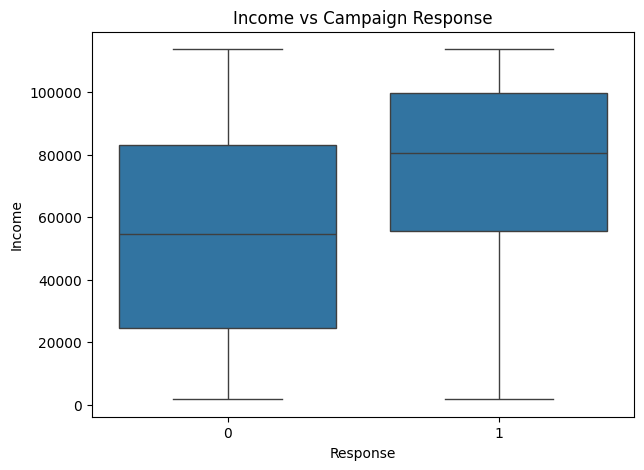

In [22]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Response', y='Income', data=df)
plt.title("Income vs Campaign Response")
plt.show()


Interpretation:

Customers who accepted campaigns generally have higher income, indicating income as a strong predictor of campaign success.

### 2.4.2 Age vs Campaign Response

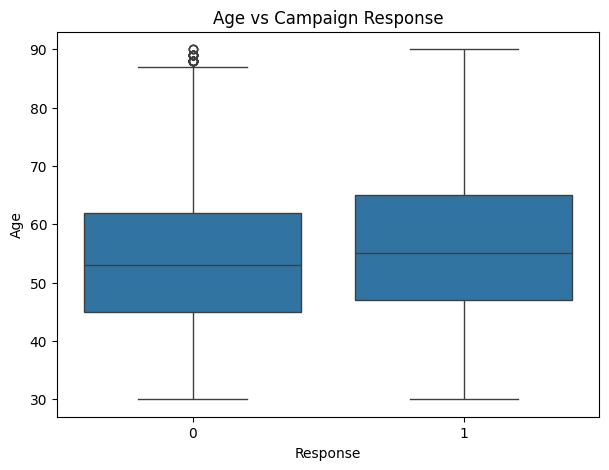

In [23]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Response', y='Age', data=df)
plt.title("Age vs Campaign Response")
plt.show()


Interpretation:

Middle-aged customers tend to respond better than very young or very old customers.

### 2.4.3 Total Spend vs Campaign Response

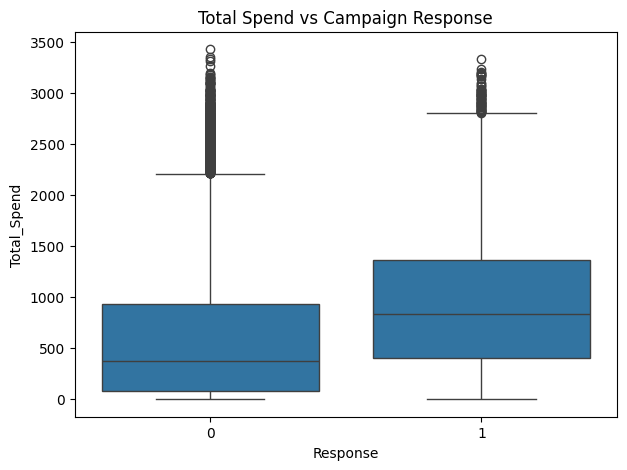

In [24]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Response', y='Total_Spend', data=df)
plt.title("Total Spend vs Campaign Response")
plt.show()


This is a GOLD insight:

High spenders are significantly more likely to accept campaigns — validating the need to prioritize high-value customers.

## 2.5 Channel Usage Analysis

#### Web Visits vs Campaign Response

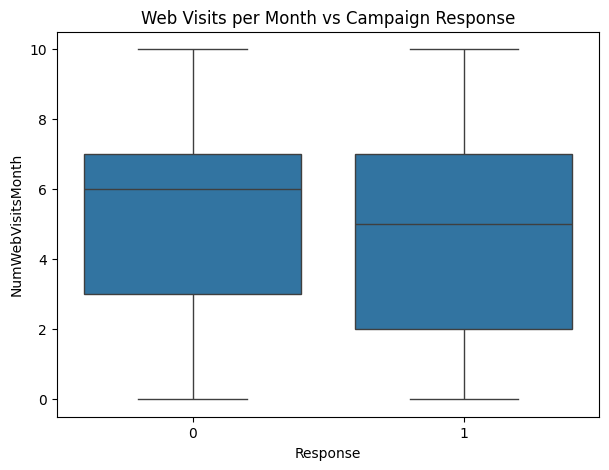

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Response', y='NumWebVisitsMonth', data=df)
plt.title("Web Visits per Month vs Campaign Response")
plt.show()


Interpretation:

Customers with higher web engagement show higher campaign responsiveness, making digital channels highly effective.

### Purchase Channel Mix (High-Level)

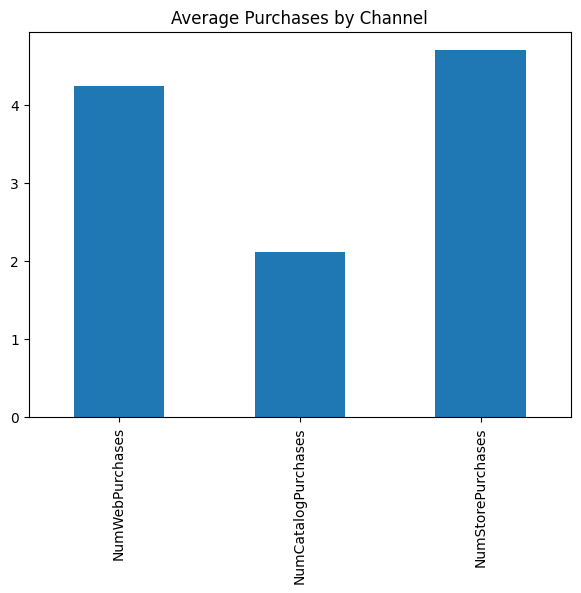

In [26]:
channel_cols = [
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases'
]

df[channel_cols].mean().plot(kind='bar', figsize=(7,5))
plt.title("Average Purchases by Channel")
plt.show()


Business takeaway:
This supports channel prioritization decisions later.

### 2.6 Product Spend Analysis

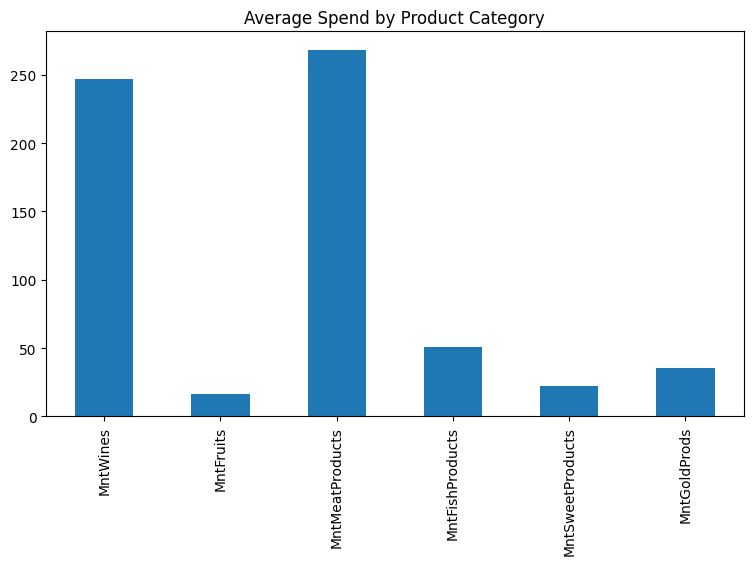

In [27]:
product_spend = df[
    ['MntWines', 'MntFruits', 'MntMeatProducts',
     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
].mean()

product_spend.plot(kind='bar', figsize=(9,5))
plt.title("Average Spend by Product Category")
plt.show()


Interpretation:

Wine and meat products dominate customer spending, suggesting they are strong anchors for promotional strategies.

### Key EDA Insights

- Campaign responders tend to have higher income and higher total spend

- High web engagement strongly correlates with campaign acceptance

- Spending is concentrated in wine and meat categories

- A small group of customers drives a large portion of revenue

## 2.8 Save Dataset for Segmentation

In [28]:
df.to_csv("../data/marketing_data_eda_ready.csv", index=False)
